<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Core-IP-Week-4/blob/master/Samuel_Wamwitha_Core_IP_Week_4_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IP Week 4: Hypothesis

##Exploratory Data Analysis

###Research Question

As a Data Scientist for the Autolib electric car-sharing service company i will investigate a claim about the blue cars from the provided Autolib dataset.

Is the number of BlueCars taken on Weekdays different than those taken on Weekends?

###Research Objectives

- Find and deal with outliers, anomalies, and missing data within the dataset.

- Plot appropriate univariate and bivariate summaries recording our observations.

- Implement the solution by performing hypothesis testing.

###Reading the Data

In [204]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
#Load our data
autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


###Checking the Data

In [206]:
# Determining number of records in the dataset
autolib.shape

(16085, 13)

In [207]:
#Previewing the head of the dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [208]:
#Previewing the tail of the dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [209]:
#Check for unique values in day_type column
autolib["day_type"].unique()

array(['weekday', 'weekend'], dtype=object)

In [210]:
#Checking for unique values in dayofweek column
autolib["dayOfWeek"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [211]:
#Checking for unique values in Postal code column
autolib["Postal code"].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [212]:
# Checking whether each column has an appropriate datatype
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

###Tidying Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


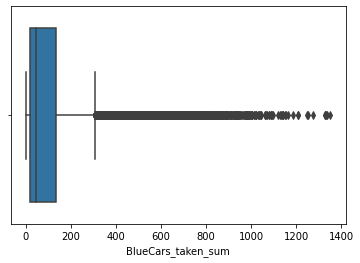

In [213]:
#Checking for outliers
sns.boxplot(autolib['BlueCars_taken_sum'])

In [214]:
#Checking for duplicates
autolib.duplicated().sum()

0

In [215]:
#Identifying missing data
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [216]:
#Dealing with missing data
autolib = autolib.dropna()

In [217]:
#Checking the dataset information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.7+ MB


In [218]:
#Dealing with outliers
blue1, blue3 = np.percentile(autolib.BlueCars_taken_sum, [25, 75]) 
iqr = blue3 - blue1
upper_bound = blue3 + (1.5 * iqr)
autolib = autolib[~(autolib.BlueCars_taken_sum>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


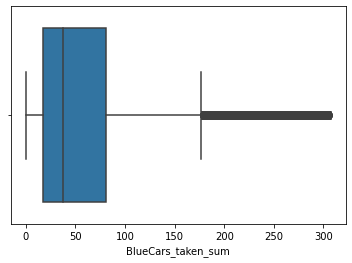

In [219]:
sns.boxplot(autolib['BlueCars_taken_sum'])

In [220]:
blue1, blue3 = np.percentile(autolib.BlueCars_taken_sum, [25, 75]) 
iqr = blue3 - blue1
upper_bound = blue3 + (1.5 * iqr)
autolib = autolib[~(autolib.BlueCars_taken_sum>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


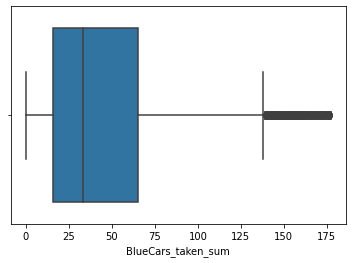

In [221]:
sns.boxplot(autolib['BlueCars_taken_sum'])

###Exploratory Analysis

####Univariate Analysis

In [222]:
#Getting the data we will use in our exploratory analysis
autolib_df = autolib[['dayOfWeek', 'day_type', 'BlueCars_taken_sum']]
autolib_df.head()

,dayOfWeek,day_type,BlueCars_taken_sum
0,0,weekday,110
1,1,weekday,98
2,2,weekday,138
3,3,weekday,104
4,4,weekday,114


In [223]:
#Changing the unique values of the column of dayofweek to their respective days.
days = {'dayOfWeek': {0 : "Monday", 1 : "Tuesday", 2 : "Wednesday", 3 : "Thursday", 4 : "Friday", 5 : "Saturday", 6 : "Sunday"}}
autolib_df.replace(days, inplace=True)
autolib_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,dayOfWeek,day_type,BlueCars_taken_sum
0,Monday,weekday,110
1,Tuesday,weekday,98
2,Wednesday,weekday,138
3,Thursday,weekday,104
4,Friday,weekday,114


In [224]:
#Value counts of BlueCars taken on days of the week.
#0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday.
autolib_df['dayOfWeek'].value_counts()

#Most BlueCars are taken on Monday.

Monday       1919
Tuesday      1917
Wednesday    1835
Thursday     1822
Friday       1804
Sunday       1775
Saturday     1735
Name: dayOfWeek, dtype: int64

In [225]:
#Value counts of BlueCars taken on Weekdays and Weekends
autolib_df["day_type"].value_counts()

 

weekday    9297
weekend    3510
Name: day_type, dtype: int64

In [226]:
#Calculating the standard deviation of BlueCars taken
autolib_df["BlueCars_taken_sum"].mean()

46.7676270789412

In [227]:
#Calculating the standard deviation of BlueCars taken
autolib_df["BlueCars_taken_sum"].std()

41.262877448151876

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


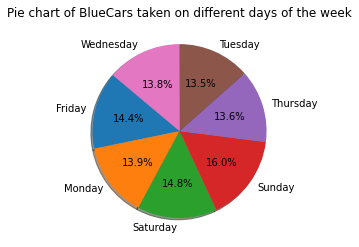

In [228]:
#Pie chart of BlueCars taken on different days of the week.
bluecars = autolib_df[['BlueCars_taken_sum', 'dayOfWeek']]
bluecars = bluecars.groupby('dayOfWeek').sum()
plt.pie(bluecars, labels=bluecars.index, autopct='%1.1f%%', shadow = True, startangle=140)
plt.title("Pie chart of BlueCars taken on different days of the week")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


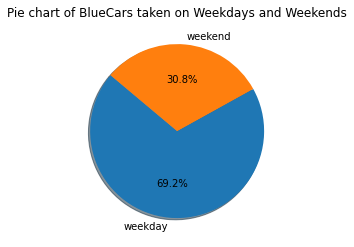

In [229]:
#Pie chart of BlueCars taken on Weekdays and Weekends
blue = autolib_df[['BlueCars_taken_sum', 'day_type']]
blue = blue.groupby('day_type').sum()
plt.pie(blue, labels=blue.index, autopct='%1.1f%%', shadow = True, startangle=140)
plt.title("Pie chart of BlueCars taken on Weekdays and Weekends")
plt.show()

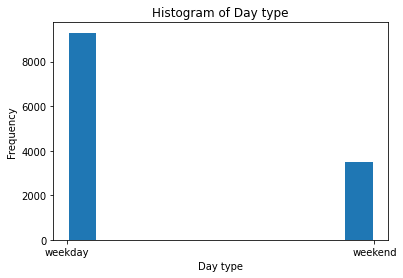

In [230]:
#Histogram of BlueCars taken on certain day types.
type_of_day = autolib_df['day_type']
plt.hist(type_of_day, bins=10, histtype='bar', rwidth=0.9)
plt.title('Histogram of Day type')
plt.xlabel('Day type')
plt.ylabel('Frequency')
plt.show()

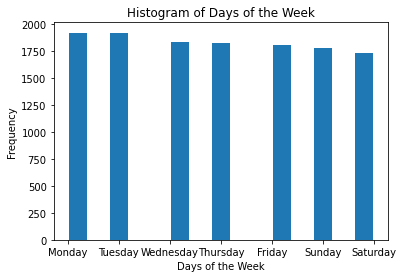

In [231]:
#Histogram of BlueCars taken on certain days of the week
days_of_week = autolib_df['dayOfWeek']
plt.hist(days_of_week, bins=15, histtype='bar', rwidth=0.9)
plt.title('Histogram of Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.show()

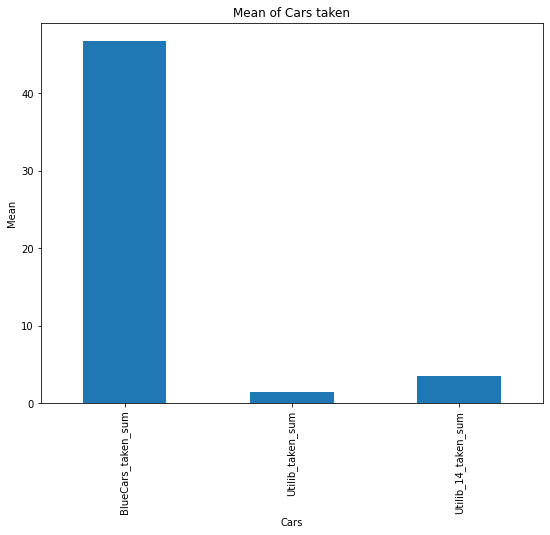

In [232]:
#Plotting the mean of different electric cars taken from the Car sharing service company
autolib[['BlueCars_taken_sum','Utilib_taken_sum','Utilib_14_taken_sum']].mean().plot(kind='bar', figsize=(9,7), title='Mean of Cars taken', xlabel = 'Cars', ylabel = 'Mean')


From the analysis, we can see:

- BlueCars are the most cars taken from the Car sharing service company

- 16.0% of BlueCars are taken on Sunday which is the highest.

- Most BlueCars are taken on Weekdays.

####Bivariate Analysis

In [233]:
#The correlation between BlueCars taken and Utilib cars taken.
coeff = autolib["BlueCars_taken_sum"].corr(autolib["Utilib_taken_sum"])
print(coeff)

0.6033839958260141


In [234]:
#The correlation between BlueCars taken and Utilib_14 cars taken.
coeff = autolib["BlueCars_taken_sum"].corr(autolib["Utilib_14_taken_sum"])
print(coeff)

0.7220265670446671


In [235]:
#The correlation between Utilib cars taken and Utilib_14 cars taken.
coeff = autolib["Utilib_taken_sum"].corr(autolib["Utilib_14_taken_sum"])
print(coeff)

0.4632197571595284


In [236]:
#The correlation between BlueCars taken and BlueCars returned.
coeff = autolib["BlueCars_taken_sum"].corr(autolib["BlueCars_returned_sum"])
print(coeff)

0.990924670740028


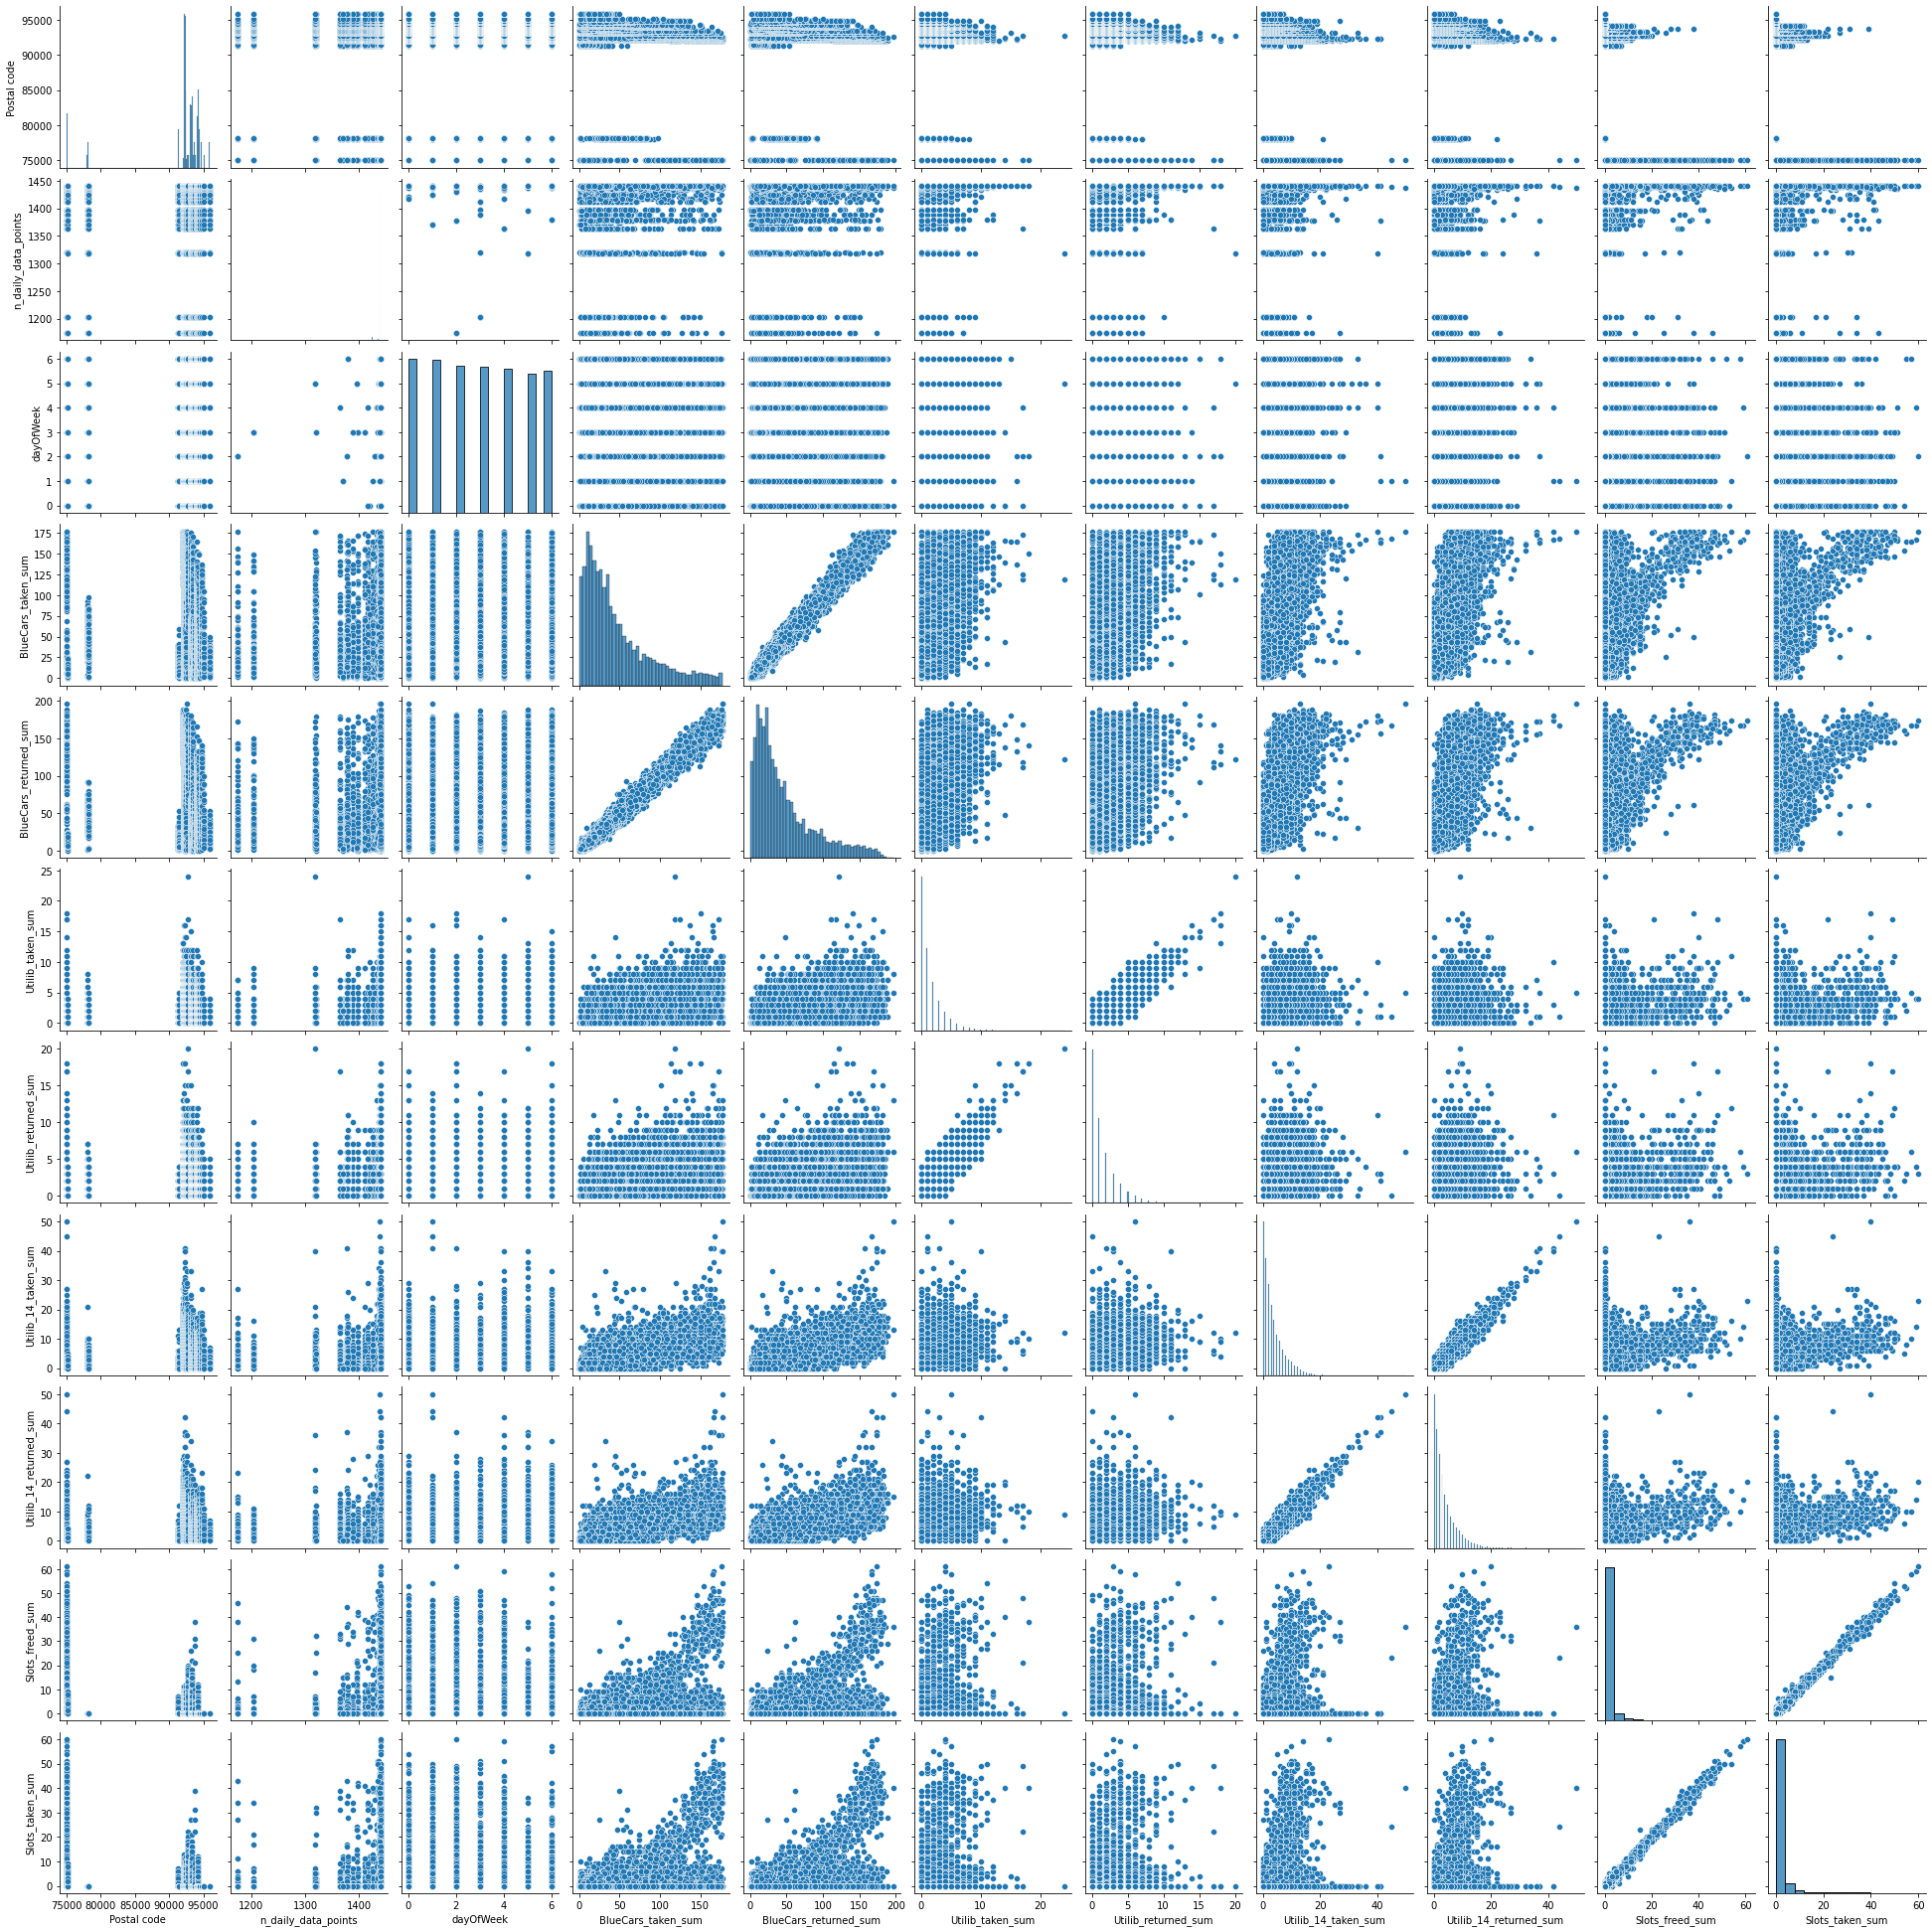

In [237]:
#Pairplot of the Autolib dataset.
sns.pairplot(autolib)

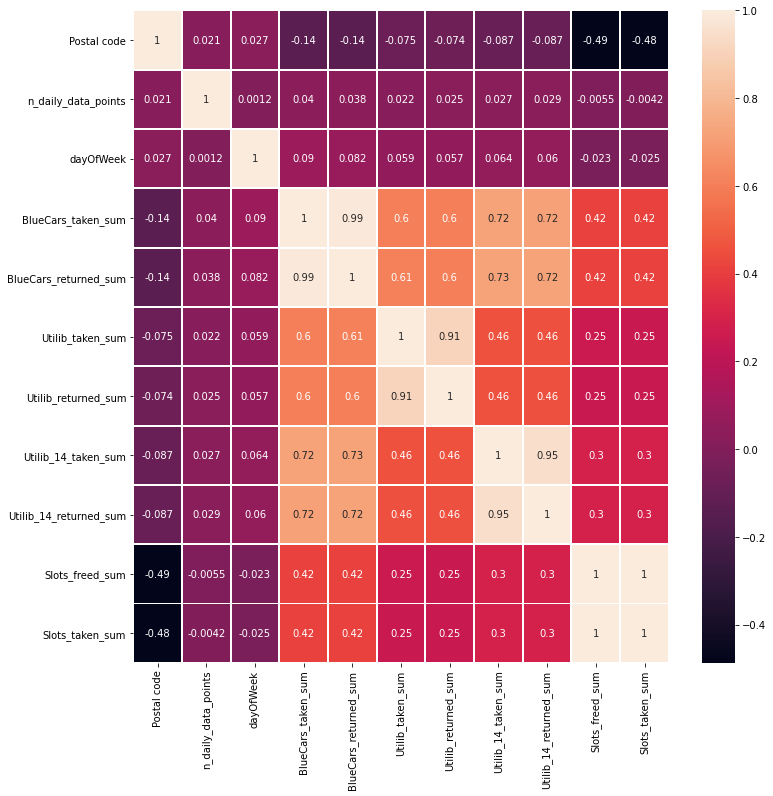

In [238]:
#Correlation matrix of the variables in the Autolib dataset
corrMatrix = autolib.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=1)
plt.show()

##Hypothesis Testing

Null hypothesis: There is no difference between the means of BlueCars taken on weekdays and weekends
 
Alternate hypothesis: There is a difference between means of BlueCars taken on weekdays and weekends.

###Test Statistic

In [239]:
#This is the data we are going to use for testing the hypothesis.
auto_df = autolib[['day_type', 'BlueCars_taken_sum']]
auto_df.head()

,day_type,BlueCars_taken_sum
0,weekday,110
1,weekday,98
2,weekday,138
3,weekday,104
4,weekday,114


In [240]:
#Viewing the shape of the dataset
auto_df.shape

(12807, 2)

In [241]:
#Getting the count, mean and standard deviation of the data.
df = auto_df.groupby(['day_type'])['BlueCars_taken_sum'].agg(['count', 'mean', 'std'])
print(df)

          count       mean        std
day_type                             
weekday    9297  44.561579  40.750966
weekend    3510  52.610826  42.039107


In [242]:
#Getting data that only contains BlueCars taken on weekdays
weekday_df = auto_df[auto_df.day_type == "weekday"]
weekday_df.head()

,day_type,BlueCars_taken_sum
0,weekday,110
1,weekday,98
2,weekday,138
3,weekday,104
4,weekday,114


In [243]:
#Getting data that only contains BlueCars taken on weekends
weekend_df = auto_df[auto_df.day_type == "weekend"]
weekend_df.head()

,day_type,BlueCars_taken_sum
20,weekend,143
41,weekend,160
47,weekend,176
48,weekend,157
54,weekend,8


In [244]:
# Selecting the sample of BlueCars taken on Weekdays.
np.random.seed(300)
weekday_sample = weekday_df.sample(n = 920, replace="False")
weekday_sample.head()

,day_type,BlueCars_taken_sum
4447,weekday,120
12361,weekday,39
11255,weekday,13
13087,weekday,87
5518,weekday,29


In [245]:
# Selecting the sample of BlueCars taken on Weekends
np.random.seed(300)
weekend_sample = weekend_df.sample(n = 350, replace="False")
weekend_sample.head()

,day_type,BlueCars_taken_sum
7763,weekend,68
12607,weekend,22
14158,weekend,76
9748,weekend,119
14457,weekend,52


In [246]:
#Calculating the components of our test statistic
x1 = weekday_sample.mean()
print(x1)

print('********************************')

x2 = weekend_sample.mean()
print(x2)

print('********************************')

s1 = weekday_sample.std()
print(s1)

print('********************************')

s2 = weekend_sample.std()
print(s2)

print('********************************')

n1 = weekday_sample.shape[0]
print(n1)

print('********************************')

n2 = weekend_sample.shape[0]
print(n2)

BlueCars_taken_sum    49.082609
dtype: float64
********************************
BlueCars_taken_sum    51.151429
dtype: float64
********************************
BlueCars_taken_sum    42.658598
dtype: float64
********************************
BlueCars_taken_sum    40.429463
dtype: float64
********************************
920
********************************
350


In [247]:
#Calculating the Z statistic for two samples
import math

z_statistic = ((x1 - x2)/math.sqrt((s1/n1) + (s2/n2)))
z_statistic

BlueCars_taken_sum   -5.141916
dtype: float64

In [248]:
#Calculating the p value
p_value = stats.norm.cdf(z_statistic)
p_value

array([1.35974996e-07])

Decision: The p value(0.000000136) is less than alpha(0.05) hence we reject the null hypothesis.

Conclusion: There is enough evidence to reject the null hypothesis at 5% level of significance hence there is a difference on the mean of BlueCars taken on Weekdays and Weekends.

###Point Estimation

In [249]:
import scipy.stats as stats
import random

In [252]:
#Calculate the population mean
population_bluecar = auto_df["BlueCars_taken_sum"].mean()
print(population_bluecar)

46.7676270789412


In [253]:
# Sample 1600 values
sample_bluecar = auto_df.BlueCars_taken_sum.sample(n = 1200, replace="False")            

# Show sample mean
print(sample_bluecar.mean())                         

# calculate how much the estimated mean differs from the main mean
population_bluecar - sample_bluecar.mean()

47.825


-1.0573729210587999

The estimate of the population mean is calculated as 47.825

Based on a sample of 1200 BlueCars taken our estimator underestimates the true mean by -1.057. Therefore our conclusion is that we can get a fairly accurate estimate of a BlueCars population mean from a fairly small sample of the BlueCars.

###Confidence Interval

In [254]:
#Sample mean of BlueCars taken sample
sample_mean = auto_df["BlueCars_taken_sum"].mean()
sample_mean

#The sample size
sample_size = auto_df["BlueCars_taken_sum"].shape[0]
sample_size

#The standard error of mean
std_error = auto_df["BlueCars_taken_sum"].std() / np.sqrt(sample_size)
std_error

#Calculating the 95% Confidence Interval for mean data
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(46.05299271432834, 47.482261443554066)

The confidence interval where our population mean estimate will lie is 46.05 - 47.48

###Maximum Likelihood Estimation

In [255]:
# Fitting the paramters of mean = 0 and standard deviation = 1
from scipy.stats import norm

parameter1 = norm.fit(weekday_df['BlueCars_taken_sum'])
parameter2 = norm.fit(weekday_sample['BlueCars_taken_sum'])

In [256]:
parameter1_weekend = norm.fit(weekend_df['BlueCars_taken_sum'])
parameter2_weekend = norm.fit(weekend_sample['BlueCars_taken_sum'])

In [257]:
x = np.linspace(-5,5,100)

#Generating the pdf
fitted_population = norm.pdf(x,loc = parameter1[0],scale = parameter1[1])
fitted_sample = norm.pdf(x, loc = parameter2[0],scale = parameter2[1])

fitted_population2 = norm.pdf(x,loc = parameter1_weekend[0],scale = parameter1_weekend[1])
fitted_sample2 = norm.pdf(x, loc = parameter2_weekend[0],scale = parameter2_weekend[1])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


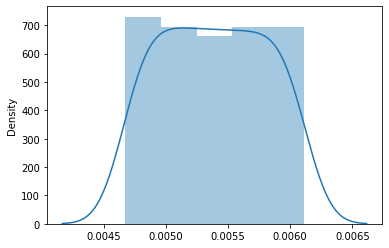

In [258]:
#Plotting the distribution plot
sns.distplot(fitted_population)

#The plot shows the data has been fitted to a fairly normal distribution.